In [6]:
#Import all the needed libraries and packages
#Analyzing from source: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE266012
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_DMSO=pd.read_csv('GSM8239427_DMSO_peaks.txt',skiprows=21, delimiter=r'\s+')
print(df_DMSO.head(10))

    chr   start     end  length  abs_summit  pileup  -log10(pvalue)  \
0  chr1   26488   26957     470       26615   273.0       277.20926   
1  chr1   90268   90997     730       90782   112.0       102.97145   
2  chr1  124436  124830     395      124500    51.0        39.29843   
3  chr1  171344  171715     372      171530    26.0         9.75355   
4  chr1  184199  184563     365      184203    36.0        15.56197   
5  chr1  186882  187306     425      186902   125.0       113.17319   
6  chr1  205883  206321     439      206126   209.0       219.11647   
7  chr1  261268  261983     716      261583   393.0       411.42297   
8  chr1  350950  351388     439      351118    93.0        93.02438   
9  chr1  403343  403738     396      403486   123.0        78.00876   

   fold_enrichment  -log10(qvalue)          name  
0         24.19091       274.59909   DMSO_peak_1  
1         17.35841       100.76988   DMSO_peak_2  
2         10.80165        37.22202   DMSO_peak_3  
3          3.9

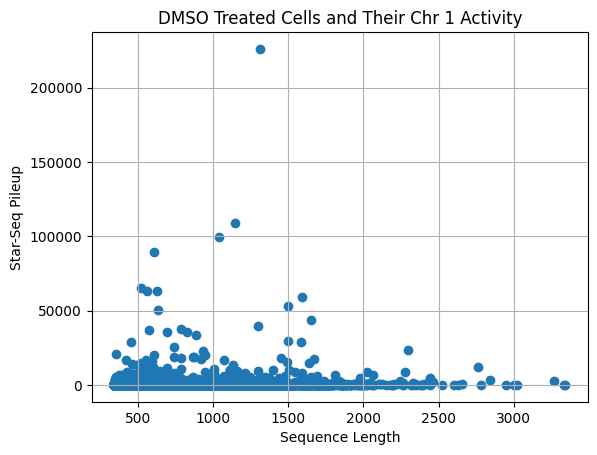

In [12]:
#Visualize the data

plt.scatter(df_DMSO['length'],df_DMSO['pileup'])
plt.title('DMSO Treated Cells and Their Chr 1 Activity')
plt.grid()
plt.xlabel('Sequence Length')
plt.ylabel('Star-Seq Pileup')
plt.show()

In [13]:
#Deriving logistic regression model

#Elucidating sigmoid function
x=df_DMSO['length']
y=df_DMSO['pileup']
def sigmoid(z):
    g= 1/(1+np.e**-z)
    return g


In [25]:
# Formulating cost

def find_cost(y,x,z):
    m=len(x)
    for i in y:
        loss=0
        loss+=-i*np.log(sigmoid(z))+(1-i)*np.log(1-sigmoid(z))
    cost=loss*(1/m)
    return cost


In [26]:
find_cost(y,x,2)

0.0045226426452407075